# Predictive Methods Project :

<ul>
  <li></li>
  <li></li>
  <li></li>
  <li></li>
  <li></li>
</ul>

Rendu :<br>
- Notebook =>  <br>
- Rapport =>  <br>
- Brouillon, plan, idées & liens utiles =>  <br>

## 0°/ Introduction :

This part will be filled when we find a correct source of data and all agreed on the topic.

## 1°/ Set up :

### 1.1°/ Pip install & Import :

In [1]:
# Some libraries may need to be installed beforehand, add any !pip install here
#!pip install pandas
#!pip install geopandas
#!pip install tqdm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm

# Turn off warning
warnings.filterwarnings('ignore')

### 1.2°/ Weather dataset :

In [3]:
# =============================================================
# == I set up the Corse zone (2A, 2B) as number (201, 202)   ==
# == Be mindful of this particularity throughout the project ==
# =============================================================

dic_test = {
    '01' : "Ain"
}

dic_test_2 = {
    # '01' : "Ain",
    # '03' : "Allier", 
    '04' : "Alpes-de-Haute-Provence",
    '06' : "Alpes-Maritimes", 
    # '07' : "Ardèche",
    '13' : "Bouches-du-Rhône",
    # '15' : "Cantal",
    # '26' : "Drôme",
    # '38' : "Isère",
    # '42' : "Loire", 
    # '43' : "Haute-Loire",
    # '69' : "Rhône",
    # '73' : "Savoie", 
    # '74' : "Haute-Savoie",
    '83' : "Var", 
    '84' : "Vaucluse"
}

En_France_métropolitaine = {
    '01' : "Ain", 
    '02' : "Aisne", 
    '03' : "Allier", 
    '04' : "Alpes-de-Haute-Provence", 
    '05' : "Hautes-Alpes", 
    '06' : "Alpes-Maritimes", 
    '07' : "Ardèche", 
    '08' : "Ardennes", 
    '09' : "Ariège", 
    '10' : "Aube", 
    '11' : "Aude", 
    '12' : "Aveyron", 
    '13' : "Bouches-du-Rhône", 
    '14' : "Calvados", 
    '15' : "Cantal", 
    '16' : "Charente", 
    '17' : "Charente-Maritime", 
    '18' : "Cher", 
    '19' : "Corrèze", 
    '201' : "Corse-du-Sud", 
    '202' : "Haute-Corse", 
    '21' : "Côte-d'Or", 
    '22' : "Côtes-d'Armor", 
    '23' : "Creuse", 
    '24' : "Dordogne", 
    '25' : "Doubs", 
    '26' : "Drôme", 
    '27' : "Eure", 
    '28' : "Eure-et-Loir", 
    '29' : "Finistère", 
    '30' : "Gard", 
    '31' : "Haute-Garonne", 
    '32' : "Gers", 
    '33' : "Gironde", 
    '34' : "Hérault", 
    '35' : "Ille-et-Vilaine", 
    '36' : "Indre", 
    '37' : "Indre-et-Loire", 
    '38' : "Isère", 
    '39' : "Jura", 
    '40' : "Landes", 
    '41' : "Loir-et-Cher", 
    '42' : "Loire", 
    '43' : "Haute-Loire", 
    '44' : "Loire-Atlantique", 
    '45' : "Loiret", 
    '46' : "Lot", 
    '47' : "Lot-et-Garonne", 
    '48' : "Lozère", 
    '49' : "Maine-et-Loire", 
    '50' : "Manche", 
    '51' : "Marne", 
    '52' : "Haute-Marne", 
    '53' : "Mayenne", 
    '54' : "Meurthe-et-Moselle", 
    '55' : "Meuse", 
    '56' : "Morbihan", 
    '57' : "Moselle", 
    '58' : "Nièvre", 
    '59' : "Nord", 
    '60' : "Oise", 
    '61' : "Orne", 
    '62' : "Pas-de-Calais", 
    '63' : "Puy-de-Dôme", 
    '64' : "Pyrénées-Atlantiques", 
    '65' : "Hautes-Pyrénées", 
    '66' : "Pyrénées-Orientales", 
    '67' : "Bas-Rhin", 
    '68' : "Haut-Rhin", 
    '69' : "Rhône", 
    '70' : "Haute-Saône", 
    '71' : "Saône-et-Loire", 
    '72' : "Sarthe", 
    '73' : "Savoie", 
    '74' : "Haute-Savoie", 
    '75' : "Paris", 
    '76' : "Seine-Maritime", 
    '77' : "Seine-et-Marne", 
    '78' : "Yvelines", 
    '79' : "Deux-Sèvres", 
    '80' : "Somme", 
    '81' : "Tarn", 
    '82' : "Tarn-et-Garonne", 
    '83' : "Var", 
    '84' : "Vaucluse", 
    '85' : "Vendée", 
    '86' : "Vienne", 
    '87' : "Haute-Vienne", 
    '88' : "Vosges", 
    '89' : "Yonne", 
    '90' : "Territoire_de_Belfort", 
    '91' : "Essonne", 
    '92' : "Hauts-de-Seine", 
    '93' : "Seine-Saint-Denis", 
    '94' : "Val-de-Marne", 
    '95' : "Val-d'Oise"
}

Region = {
    "Auvergne-Rhône-Alpes": [1, 3, 7, 15, 26, 38, 42, 43, 69, 73, 74],
    "Bourgogne-Franche-Comté": [21, 25, 39, 58, 70, 71, 89, 90],
    "Bretagne": [22, 29, 35, 56],
    "Centre-Val de Loire": [18, 28, 36, 37, 41, 45],
    "Grand Est": [8, 10, 51, 52, 54, 55, 57, 67, 68, 88],
    "Hauts-de-France": [2, 59, 60, 62, 80],
    "Île-de-France": [75, 77, 78, 91, 92, 93, 94, 95],
    "Normandie": [14, 27, 50, 61, 76],
    "Nouvelle-Aquitaine": [16, 17, 19, 23, 24, 33, 40, 47, 64, 79, 86, 87],
    "Occitanie": [9, 11, 12, 30, 31, 32, 34, 46, 48, 65, 66, 81, 82],
    "Pays de la Loire": [44, 49, 53, 72, 85],
    "Provence-Alpes-Côte d'Azur": [4, 6, 13, 83, 84],
}

d_rtt = {'NUM_POSTE' : 'string',
'NOM_USUEL' : 'string',
'LAT' : 'string',
'LON' : 'string',
'ALTI' : 'string',
'AAAAMMJJ' : 'string',
'RR' : 'string', # Good ,<5% NaN Stations
'TM' : 'string', # Good, <5% NaN Stations
# 'TN50' : 'string', Close to no stations doing that
'FFM' : 'string', # Average, >60% NaN Stations
# 'DRR' : 'string', Close to no stations doing that
}

d_autre_para = {'NUM_POSTE' : 'string',
'NOM_USUEL' : 'string',
'LAT' : 'string',
'LON' : 'string',
'ALTI' : 'string',
'AAAAMMJJ' : 'string',
#'DHUMEC' : 'string', Close to no stations doing that
'GLOT' : 'string', # Missing data on one departement
'INST' : 'float', # ~40/50 Station doing it, need to check it real close + Missing data on one departement
#'UV' : 'float', No stations doing that
'UM' : 'float', # Average, >60% NaN Stations
#'NEIG' : 'int', # Close to no stations doing that
#'BROU' : 'int', # Close to no stations doing that
#'ORAG' : 'int', # Some department doesn't have any station doing that
#'GRESIL' : 'int', # Some department doesn't have any station doing that
#'GRELE' : 'int', # Some department doesn't have any station doing that
#'ROSEE' : 'int', # Some department doesn't have any station doing that
#'VERGLAS' : 'int', # Some department doesn't have any station doing that
#'SOLNEIGE' : 'int', # Some department doesn't have any station doing that
#'GELEE' : 'int', # Some department doesn't have any station doing that
#'FUMEE' : 'int', # Close to no stations doing that
#'BRUME' : 'int', # Close to no stations doing that
#'ECLAIR' : 'int' # Some department doesn't have any station doing that
}

In [4]:
def base_data_cleaning(df, start_year, end_year):
    """
    This function does 2 things :
    - By manually setting it, keep only data between 2 given year
    - It allow to drop all rows with NaN value that should have contained mandatory information
    """

    # I'm a baka
    df['AAAAMMJJ'] = df['AAAAMMJJ'].astype('str')
    df['NUM_POSTE'] = df['NUM_POSTE'].astype('str')

    # Drop rows without id
    df = df.dropna(subset = ['NUM_POSTE', 'AAAAMMJJ'])

    # ===========================================
    # == Only keep Data between the set period ==
    # ===========================================
    df = df[df['AAAAMMJJ'].str[:4].astype('int').between(start_year, end_year)]

    return df

def modify_columns(df, key, value):
    """
    Extract the feature of the date columns
    Also assign the department number and name to the extracted data
    """
    #df = df.drop(Col_to_drop, axis = 1)
    #df = df.drop(Q_col_to_drop, axis = 1)

    df['date'] = pd.to_datetime(df['AAAAMMJJ'], format='%Y%m%d')
    #df['Year'] = df['AAAAMMJJ'].str[:4]
    #df['Month'] = df['AAAAMMJJ'].str[4:6]
    #df['Day'] = df['AAAAMMJJ'].str[-2:]
    
    df['dept_numb'] = key
    df['dept_name'] = value

    return df

def webo_scrappo_el_dataframo(start_y, end_y):
    """
    Extract the weather data from all department of the metropolitan France on a given period of time
    This function use the following link :
    https://www.data.gouv.fr/datasets/donnees-climatologiques-de-base-quotidiennes
    To extract from data.gouv for each department all 4 related datasets.
    Then proceed by merging and concatenating all of them
    """
    df_metropo = pd.DataFrame()
    dept_error = []

    # Data source : https://www.data.gouv.fr/datasets/donnees-climatologiques-de-base-quotidiennes

    # The download link is such as :
    # url_base + "department number" + url_end{RTT_1950, autre_1950, RTT_2025, autre_2025}
    # We have 95 department in the metropolitan area : 95 'Dept_number'
    # All department have a dataset for RTT & Other_feature, then those cover both the 1950-2023 period and 2024-2025 period : 4 datasets per department
    # => around 95*4 = 380 url

    url_base = "https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/BASE/QUOT/Q_"
    
    url_end_RTT_1950 = "_previous-1950-2023_RR-T-Vent.csv.gz"
    url_end_autre_1950 = "_previous-1950-2023_autres-parametres.csv.gz"
    url_end_RTT_2025 = "_latest-2024-2025_RR-T-Vent.csv.gz"
    url_end_autre_2025 = "_latest-2024-2025_autres-parametres.csv.gz"

    for key, value in tqdm(dic_test_2.items(), desc="Downloading depts"):

        try :

            url = url_base + key
            df_temp_RTT_1950 = pd.read_csv(url + url_end_RTT_1950, sep = ';', usecols = d_rtt.keys(), compression = 'gzip')
            df_temp_autre_1950 = pd.read_csv(url + url_end_autre_1950, sep = ';', usecols = d_autre_para.keys(), compression = 'gzip')
            df_temp_RTT_2025 = pd.read_csv(url + url_end_RTT_2025, sep = ';', usecols = d_rtt.keys(), compression = 'gzip')
            df_temp_autre_2025 = pd.read_csv(url + url_end_autre_2025, sep = ';', usecols = d_autre_para.keys(), compression = 'gzip')

            df_temp_RTT_1950 = base_data_cleaning(df_temp_RTT_1950, start_y, end_y)
            df_temp_autre_1950 = base_data_cleaning(df_temp_autre_1950, start_y, end_y)
            df_temp_RTT_2025 = base_data_cleaning(df_temp_RTT_2025, start_y, end_y)
            df_temp_autre_2025 = base_data_cleaning(df_temp_autre_2025, start_y, end_y)

            df_temp_1950 = pd.merge(df_temp_RTT_1950, df_temp_autre_1950, on = ['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ'], how = "left")
            df_temp_2025 = pd.merge(df_temp_RTT_2025, df_temp_autre_2025, on = ['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ'], how = "left")

            df_temp = pd.concat([df_temp_1950, df_temp_2025])
            
            df_temp = modify_columns(df_temp, key, value)

            df_metropo = pd.concat([df_metropo, df_temp])
            
            #print(key)
        
        except:
            dept_error.append(key)

        # This print the progress
        # tqdm.write(f"➡ Dept: {key}")

    print(dept_error)

    return df_metropo

In [5]:
df = webo_scrappo_el_dataframo(2015, 2025)
df.shape

[]


(654569, 15)

### 1.3°/ Energy consumption dataset :

The best energy dataset source <a href = "https://www.data.gouv.fr/organizations/open-data-reseaux-energies-1/">ODRE</a>

In [6]:
df_elec = pd.read_csv("https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/consommation-quotidienne-brute-regionale/exports/csv?use_labels=true",
                      sep = ';')
df_elec.head()

,Date - Heure,Date,Heure,Code INSEE région,Région,Consommation brute gaz (MW PCS 0°C) - NaTran,Statut - NaTran,Consommation brute gaz (MW PCS 0°C) - Teréga,Statut - Teréga,Consommation brute gaz totale (MW PCS 0°C),Consommation brute électricité (MW) - RTE,Statut - RTE,Consommation brute totale (MW),flag_ignore
0,2013-06-05T04:00:00+00:00,2013-06-05,06:00,44,Grand Est,5000.0,Définitif,NaN,NaN,5000.0,4556.0,Définitif,9556.0,non
1,2013-06-05T04:00:00+00:00,2013-06-05,06:00,93,Provence-Alpes-Côte d'Azur,2811.0,Définitif,NaN,NaN,2811.0,3324.0,Définitif,6135.0,non
2,2013-06-05T04:30:00+00:00,2013-06-05,06:30,28,Normandie,NaN,NaN,NaN,NaN,NaN,2743.0,Définitif,NaN,non
3,2013-06-05T04:30:00+00:00,2013-06-05,06:30,32,Hauts-de-France,NaN,NaN,NaN,NaN,NaN,5194.0,Définitif,NaN,non
4,2013-06-05T04:30:00+00:00,2013-06-05,06:30,75,Nouvelle-Aquitaine,NaN,NaN,NaN,NaN,NaN,3687.0,Définitif,NaN,non


### 1.4°/ Visualization set up :

In [7]:
# If you're working on an anaconda environment, do the following :
# *Open anaconda prompt terminal* (NOT ANOTHER ONE, THIS ONE ESPECIALLY)
# conda create -n "name_of_your_environment" python=3.14
# conda activate name_of_your_environment
# conda install -c conda-forge geopandas
# pip install of conda install on any other terminal will end in a error with the "pyogrio" module. Why ? The hell I don't know.

# https://www.data.gouv.fr/api/1/datasets/r/aacf9338-8944-4513-a7b9-4cd7c2db2fa9

import geopandas as gpd
import matplotlib as plt

In [8]:
# Non metropolitan France + Corsia
reg_useless = ['01', '02', '03', '04', '06', '94']

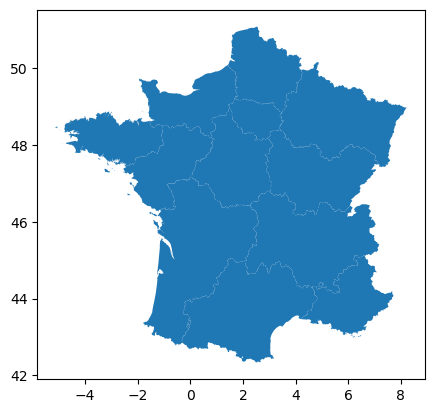

In [9]:
gdf = gpd.read_file('datasets/regions-20180101.shp')
gdf = gdf[~gdf['code_insee'].isin(reg_useless)]
gdf.plot() ;

## 2°/ Pre-processing :

### 2.1 : Data cleaning :

#### 2.1.1°/ Weather df :

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = (df['FFM'].groupby(df['date'].dt.year)
                  .apply(lambda x: round(x.isnull()
                         .mean() * 100, 2)))

# Get the number of stations in activity each year
stations_in_activity = df['NUM_POSTE'].groupby(df['date'].dt.year).nunique()

# Create a dataframe to hold the missing values and stations in activity
missing_values_df = pd.DataFrame({'missing_values': missing_values, 'stations_in_activity': stations_in_activity})

missing_values_df

,missing_values,stations_in_activity
date,,
2015,60.82,203
2016,59.66,198
2017,58.67,195
2018,57.83,190
2019,56.16,184
2020,55.79,182
2021,46.11,151
2022,43.12,140
2023,42.66,141


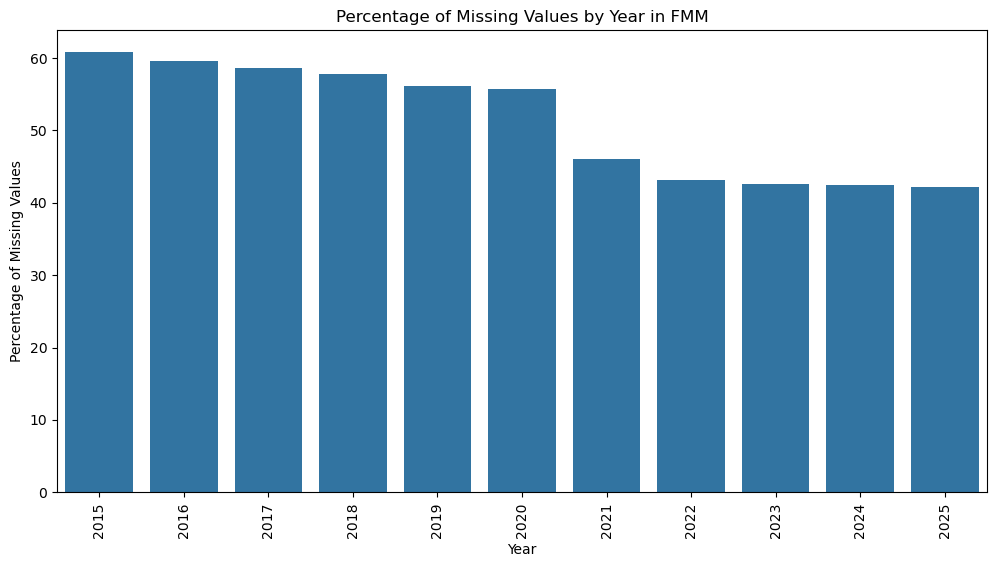

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Year in FMM')
plt.xlabel('Year')
plt.ylabel('Percentage of Missing Values')
plt.show()

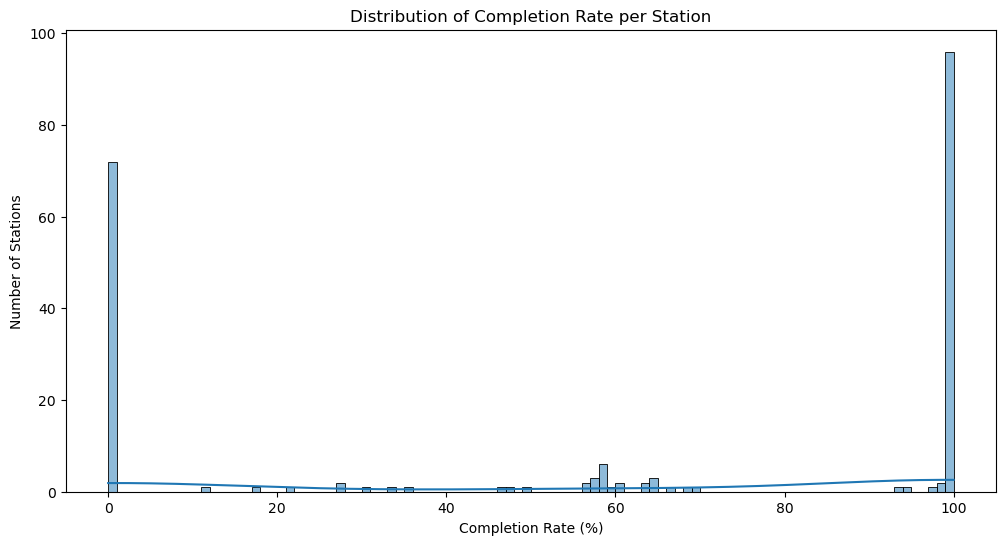

In [12]:
# Display the distribution of completion rate per station
completion_rate = df.groupby('NUM_POSTE')['TM'].apply(lambda x: x.notnull().mean() * 100)
plt.figure(figsize=(12, 6))
sns.histplot(completion_rate, bins=100, kde=True)
plt.title('Distribution of Completion Rate per Station')
plt.xlabel('Completion Rate (%)')
plt.ylabel('Number of Stations')
plt.show()

In [13]:
def filtero_el_dataframo(df):
    """
    The goal of this function is to loop through each features of our freshly extracted dataframe to
    to extract the average of each feature by department.
    Each iteration will proceed with multiple steps :
    - Take one of the feature columns
    - Find all stations that have a 80% completion rate or above of this feature
    - Filter on a copy of the df the information columns and the feature being iterated
    - Make an average on department level on the iterated feature
    - Merge the result with the cleaned version using the "date_col
    """

    # Extracted from d_rtt & d_autre_para
    feature_available = ['RR', 'TM', 'FFM', 'GLOT', 'INST', 'UM']
    id_col = ['date', 'dept_numb', 'dept_name', 'NUM_POSTE']
    df_clean = pd.DataFrame()
    
    df = df.drop(columns = ['NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ'])

    for col in tqdm(feature_available, desc = "Columns processed : "):
        
        # Filtering
        completion_rate = df.groupby('NUM_POSTE')[col].apply(lambda x: x.notnull().mean() * 100)
        df_filtered = df[id_col + [col]]
        df_filtered = df[df['NUM_POSTE'].map(completion_rate) >= 80.0]
        #print("filtering done")

        # Aggregation
        df_filtered = df_filtered.groupby(id_col[:3])[col].mean().reset_index()
        #print("Aggregation done")

        # Merging
        if df_clean.empty:
            df_clean = df_filtered
        else:
            df_clean = pd.merge(df_clean, df_filtered, on = id_col[:3], how = 'left')
        #print("Merging done")

    return df_clean


In [14]:
df_clean = filtero_el_dataframo(df)
df_clean.head()

Columns processed : 100%|██████████| 6/6 [00:00<00:00,  9.31it/s]


,date,dept_numb,dept_name,RR,TM,FFM,GLOT,INST,UM
0,2015-01-01,04,Alpes-de-Haute-Provence,0.011111,-1.625000,1.525000,710.0,491.0,74.444444
1,2015-01-01,06,Alpes-Maritimes,0.004255,4.227586,2.315000,773.0,492.5,58.277778
2,2015-01-01,13,Bouches-du-Rhône,0.008000,3.747059,2.117647,740.0,500.0,71.866667
3,2015-01-01,83,Var,0.026316,4.840000,2.516667,764.0,506.5,71.133333
4,2015-01-01,84,Vaucluse,0.004082,2.115385,1.925000,716.0,492.0,72.083333


In [15]:
feature_available = ['RR', 'TM', 'FFM', 'GLOT', 'INST', 'UM']
missing_values_df = pd.DataFrame()

for col in feature_available:
       missing_values = (df_clean[col].groupby(df_clean['dept_name'])
                     .apply(lambda x: round(x.isnull()
                            .mean() * 100, 2)))

       missing_values_df[col] = pd.DataFrame({'missing_values': missing_values})

missing_values_df

,RR,TM,FFM,GLOT,INST,UM
dept_name,,,,,,
Alpes-Maritimes,0.03,0.03,0.03,0.03,0.03,0.03
Alpes-de-Haute-Provence,0.00,0.00,0.00,0.20,0.15,0.00
Bouches-du-Rhône,0.00,0.00,0.00,0.05,0.03,0.00
Var,0.00,0.00,0.00,0.00,0.00,0.00
Vaucluse,0.00,0.00,0.00,0.00,0.00,0.00


In [16]:
df_clean = df_clean.sort_values('date')
df_clean = df_clean.set_index('date')

#### 2.1.2°/ Energy df :

ALL PRAISE DA LORDO, THIS ONE GOT NO EMPTY ROWS

In [20]:
df_elec['date'] = pd.to_datetime(df_elec['Date'])
df_elec = df_elec[df_elec['Région'] == "Provence-Alpes-Côte d'Azur"]

df_elec['total_energy_consumption_MW'] = (
    df_elec['Consommation brute gaz totale (MW PCS 0°C)'] +
    df_elec['Consommation brute électricité (MW) - RTE']
)

df_elec = df_elec.groupby('date')['total_energy_consumption_MW'].sum().reset_index()

df_elec = df_elec.loc[df_elec['date'] >= '2015-01-01']

In [21]:
df_merge = df_clean.groupby('date')[['RR', 'TM', 'FFM', 'GLOT', 'INST', 'UM']].sum().reset_index()
df_merge = pd.merge(df_merge, df_elec, on = ['date'], how = 'left')
df_merge = df_merge.set_index('date')
df_merge = df_merge.sort_index()

In [26]:
# ==========================================================================================================
# == Download the dataframe when the cleaning is done, so that you don't need to rerun the whole processs ==
# ==========================================================================================================

df_clean.to_csv("datasets/Weather_data_2015-2025_by_dept.csv", index=False)
df_merge.to_csv("datasets/final_dataset.csv", index=False)

### 2.2°/ Explanatory data analysis :

In [22]:
df_merge

,RR,TM,FFM,GLOT,INST,UM,total_energy_consumption_MW
date,,,,,,,
2015-01-01,0.053764,13.305030,10.399314,3703.0,2482.0,347.805556,278671.0
2015-01-02,0.129472,28.465293,12.808431,3618.5,2290.0,309.861111,289199.0
2015-01-03,0.100607,46.744496,19.859542,3415.0,2127.0,343.605556,251025.0
2015-01-04,0.042096,51.222848,26.428333,3909.5,2535.0,296.624603,233120.0
2015-01-05,0.085218,23.631565,9.517516,3864.5,2501.5,323.598413,305739.0
...,...,...,...,...,...,...,...
2025-11-24,25.711302,39.683248,11.986699,1833.5,321.5,459.649020,NaN
2025-11-25,0.162985,29.086690,23.836242,4447.5,2419.0,341.062418,NaN
2025-11-26,0.043275,25.147459,24.819020,4078.0,2230.5,289.278105,NaN


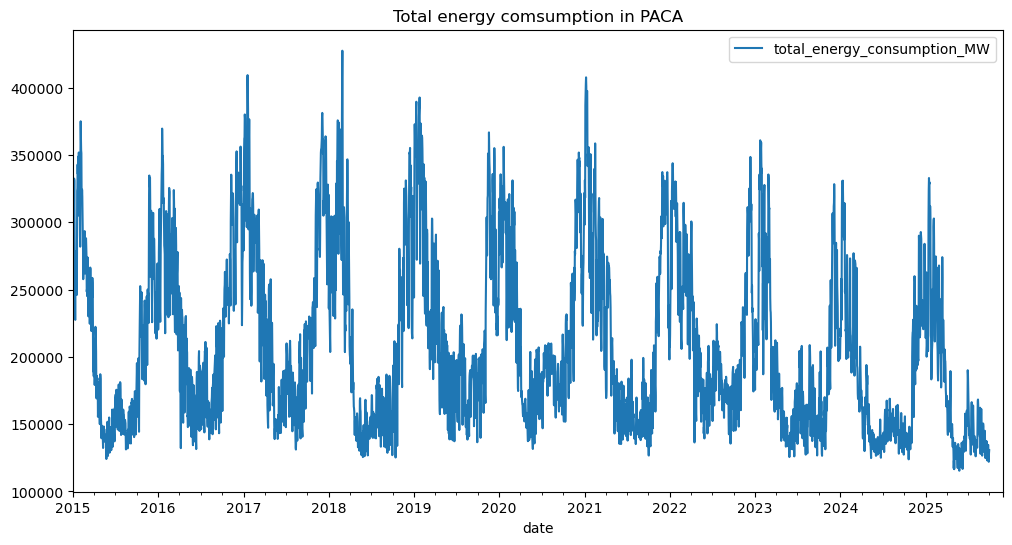

In [24]:
df_merge[['total_energy_consumption_MW']].plot(figsize=(12,6))
plt.title('Total energy comsumption in PACA')
plt.show()

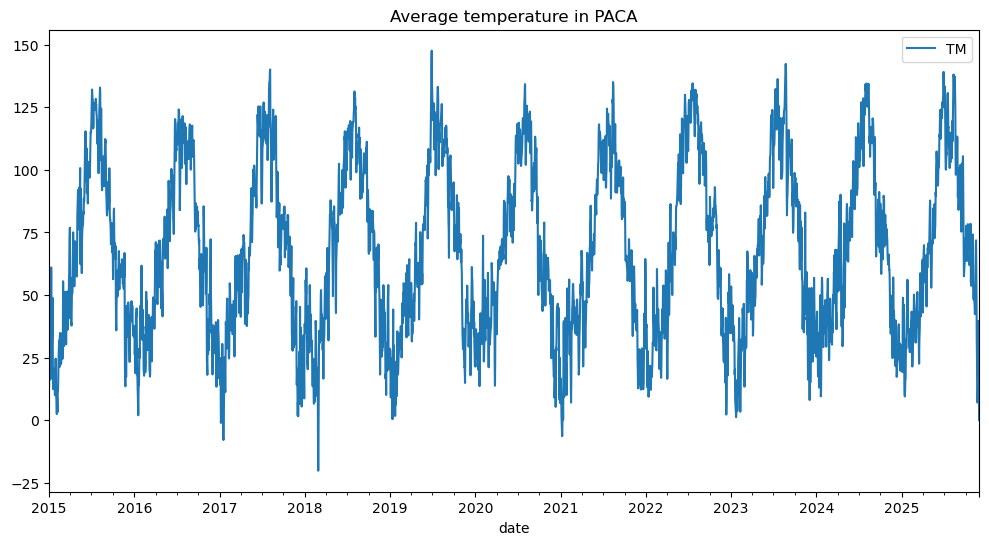

In [25]:
df_merge[['TM']].plot(figsize=(12,6))
plt.title('Average temperature in PACA')
plt.show()

## 3°/ Feature engineering (if needed) :

<ul>
  <li>List here the different feature extraction we can use depending on the model we will use. (Again this part may not be used so don't waste time on it)</li>
</ul>

## 4°/ Modeling :

We can do multiple model here to obtain different results so that we can debate over them later on.

### 4.1°/ 1st model :

### 4.i°/ i-ième model :

## 5°/ Models prediction & Metrics evaluation :